<a href="https://colab.research.google.com/github/korkutanapa/ANOMALY_DETECTION_TDA_YAHOO_DATASET/blob/main/TIME_SERIES_SIMULATOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulator

# Multi-Seasonal SARIMA-Based Time Series Simulator  
## Full Mathematical Description and Interpretation (Google Colab Version)

This document provides a complete mathematical explanation of the time series simulator implemented in the accompanying Python code. The simulator generates a **general multi-seasonal SARIMA-type stochastic process** with:

- Non-seasonal ARMA dynamics  
- Multiple seasonal ARMA components at different periods  
- Non-seasonal and seasonal stochastic differencing  
- Optional deterministic polynomial trend  
- Additive Gaussian white noise  
- A global level (mean) shift

This simulator is suitable for testing:

- SARIMA/SARIMAX forecasting models  
- STL/MSTL decomposition  
- Hybrid statistical–machine learning pipelines  
- Anomaly detection and signal processing algorithms  

---

## 1. Notation and Basic Definitions

- **Time index:**
$$
t = 0,1,\dots,n-1
$$

- **Final simulated time series:**
$$
y_t
$$

- **Innovations (white noise):**
$$
\varepsilon_t \sim \mathcal{N}(0,\sigma^2),
\quad \sigma^2 = \texttt{wn\_var}
$$

- **Global level / mean shift:**
$$
\mu = \texttt{wn\_mean}
$$

- **Lag operator:**
$$
L y_t = y_{t-1}
$$

User-defined model orders:

- Non-seasonal AR order: $p$  
- Non-seasonal MA order: $q$  
- Non-seasonal differencing order: $d$  
- Number of seasonal components: $K$  

For each seasonal component $k=1,\dots,K$:

- Seasonal period: $s_k$  
- Seasonal differencing order: $D_k$  
- Seasonal AR order: $P_k$  
- Seasonal MA order: $Q_k$  

---

## 2. Non-Seasonal ARMA Polynomials

Given coefficients
$$
\phi_1,\dots,\phi_p,
\qquad
\theta_1,\dots,\theta_q,
$$

the non-seasonal AR and MA polynomials are:

$$
\varphi_{\text{ns}}(L)
= 1 - \phi_1 L - \phi_2 L^2 - \cdots - \phi_p L^p,
$$

$$
\theta_{\text{ns}}(L)
= 1 + \theta_1 L + \theta_2 L^2 + \cdots + \theta_q L^q.
$$

---

## 3. Seasonal ARMA Polynomials (Each Seasonal Component)

For each seasonal component $k$:

### Seasonal AR polynomial
$$
\Phi_k(L^{s_k})
= 1 - \Phi_{k,1} L^{s_k}
- \Phi_{k,2} L^{2s_k}
- \cdots
- \Phi_{k,P_k} L^{P_k s_k}.
$$

### Seasonal MA polynomial
$$
\Theta_k(L^{s_k})
= 1 + \Theta_{k,1} L^{s_k}
+ \Theta_{k,2} L^{2s_k}
+ \cdots
+ \Theta_{k,Q_k} L^{Q_k s_k}.
$$

---

## 4. Combined AR and MA Polynomials (Multiple Seasonality)

The final AR and MA polynomials are obtained by polynomial multiplication:

$$
\varphi(L)
= \varphi_{\text{ns}}(L)\prod_{k=1}^{K} \Phi_k(L^{s_k}),
$$

$$
\theta(L)
= \theta_{\text{ns}}(L)\prod_{k=1}^{K} \Theta_k(L^{s_k}).
$$

This convolution embeds **all seasonal and non-seasonal AR/MA dynamics** into one ARMA structure.

---

## 5. Stationary ARMA Core Process

The stationary core process $w_t$ is defined by:

$$
\varphi(L) w_t = \theta(L)\varepsilon_t,
\quad \varepsilon_t \sim \mathcal{N}(0,\sigma^2).
$$

Expanded form:

$$
w_t = \sum_{j=1}^{p^*} \tilde{\phi}_j w_{t-j}
+ \varepsilon_t
+ \sum_{j=1}^{q^*} \tilde{\theta}_j \varepsilon_{t-j}.
$$

---

## 6. Non-Seasonal Stochastic Differencing (Order $d$)

Non-seasonal differencing is defined by:

$$
(1 - L)^d y_t = w_t.
$$

The simulator inverts this via cumulative sums:

- $d = 0$: stationary  
- $d = 1$: random walk  
- $d = 2$: stochastic acceleration  

For $d = 1$:
$$
y_t = \sum_{i=0}^{t} w_i.
$$

---

## 7. Seasonal Stochastic Differencing (Orders $D_k$)

For each seasonal component:

$$
(1 - L^{s_k})^{D_k} y_t = z_t.
$$

For one seasonal difference:

$$
y_t =
\begin{cases}
z_t, & t < s_k, \\
z_t + y_{t-s_k}, & t \ge s_k.
\end{cases}
$$

Together with non-seasonal differencing:

$$
(1 - L)^d \prod_{k=1}^{K} (1 - L^{s_k})^{D_k} y_t = w_t.
$$

---

## 8. Deterministic Trend Component

Optional deterministic polynomial trend:

### Linear
$$
T_t = a + bt
$$

### Quadratic
$$
T_t = a + bt + ct^2
$$

Added additively:
$$
y_t \leftarrow y_t + T_t.
$$

---

## 9. Global Level / Mean Shift

A constant level shift is added:

$$
y_t \leftarrow y_t + \mu.
$$

---

## 10. Final Model Representation (Compact)

The full stochastic–deterministic model satisfies:

$$
\varphi(L)(1-L)^d
\prod_{k=1}^{K} (1-L^{s_k})^{D_k}
\bigl(y_t - T_t - \mu\bigr)
= \theta(L)\varepsilon_t.
$$

Equivalent form:

$$
y_t = y_t^{(\text{multi-seasonal SARIMA})} + T_t + \mu.
$$

---

## 11. Interpretation of Each Component

| Component | Mathematical Role | Effect on Signal |
|----------|-------------------|------------------|
| $w_t$ | Stationary ARMA | Local temporal dependency |
| $d$ | Non-seasonal differencing | Long-term stochastic trend |
| $D_k$ | Seasonal differencing | Seasonal stochastic drift |
| $s_k$ | Seasonal period | Length of cycles |
| $T_t$ | Deterministic trend | Systematic growth/decay |
| $\mu$ | Global mean | Operating level |
| $\varepsilon_t$ | White noise | Random uncertainty |

---

## 12. Final Conceptual Summary

This simulator generates a **general multi-seasonal nonstationary SARIMA process with optional deterministic trend**, allowing:

- Arbitrary non-seasonal ARMA structure  
- Any number of seasonal cycles  
- Both non-seasonal and seasonal stochastic differencing  
- Additive deterministic polynomial trend  
- Realistic noise-driven dynamics  

It is mathematically suitable for:

- Forecasting benchmark generation  
- Decomposition validation (STL, MSTL)  
- Feature extraction research (TDA, statistical)  
- Industrial production signal simulation  
- Anomaly detection stress testing  

✅ **This simulator is mathematically equivalent to a generalized multi-seasonal SARIMA model with polynomial deterministic trend and global level shift.**


Is the time series stationary? (y/n): n
Non-stationary chosen. Non-seasonal differencing order d (0,1,2): 1
Enter non-seasonal AR order p (>=0): 2
Enter 2 non-seasonal AR coefficients (phi1,...,phip) separated by commas: 0.4,0.3
Enter non-seasonal MA order q (>=0): 2
Enter 2 non-seasonal MA coefficients (theta1,...,thetaq) separated by commas: 0.2,0.2
How many seasonal components do you want to add? (0,1,2,...): 1

--- Seasonal component 1 ---
Enter seasonal period s (e.g. 12, 24, 7, 168, 365): 8
Enter seasonal differencing order D (0,1,2): 0
Enter seasonal AR order P (>=0): 2
Enter 2 seasonal AR coefficients (Phi1,...,PhiP) separated by commas: 0.2,0.2
Enter seasonal MA order Q (>=0): 2
Enter 2 seasonal MA coefficients (Theta1,...,ThetaQ) separated by commas: 0.1,0.8
Enter global level / mean to add at the end (e.g. 0.0): 0
Enter white noise variance (e.g. 1.0): 1
Enter length of time series (number of points): 300

Final AR polynomial (for ArmaProcess): [ 1.   -0.4  -0.3   0.    0.  

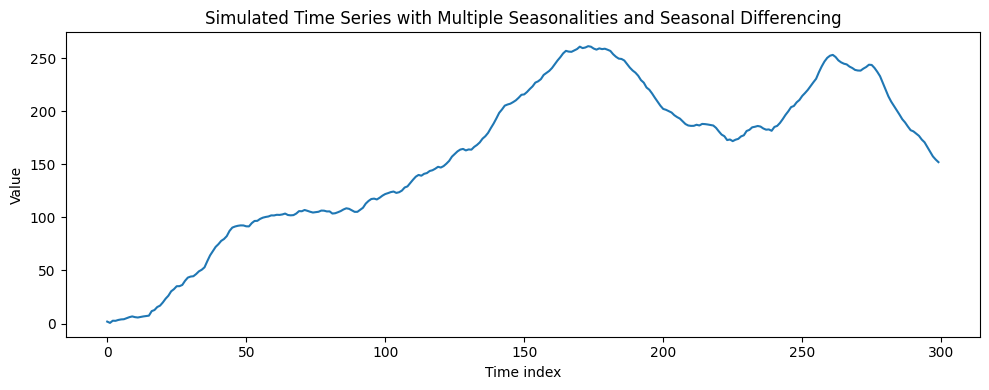

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# ============================================
# Helper functions
# ============================================

def get_int(prompt, min_val=None, max_val=None):
    while True:
        try:
            val = int(input(prompt))
            if (min_val is not None and val < min_val):
                print(f"Please enter an integer >= {min_val}.")
                continue
            if (max_val is not None and val > max_val):
                print(f"Please enter an integer <= {max_val}.")
                continue
            return val
        except ValueError:
            print("Please enter a valid integer.")

def get_float(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Please enter a valid number.")

def get_float_list(prompt, length):
    """
    Ask for a list of floats, e.g. '0.5, -0.3, 0.1' and check length.
    """
    while True:
        text = input(prompt).strip()
        try:
            vals = [float(x) for x in text.replace(";", ",").split(",") if x.strip() != ""]
            if len(vals) != length:
                print(f"Please enter exactly {length} values.")
                continue
            return vals
        except ValueError:
            print("Please enter valid numbers separated by commas.")

def seasonal_integrate_one(z, s):
    """
    Invert one seasonal difference (1 - L^s).
    Given z_t = (1 - L^s) y_t, recover y_t with:
      y_t = z_t + y_{t-s}, for t >= s
    For t < s, we set y_t = z_t (no previous seasonal term).
    """
    n = len(z)
    y = np.zeros_like(z)
    for t in range(n):
        if t < s:
            y[t] = z[t]
        else:
            y[t] = z[t] + y[t - s]
    return y

# ============================================
# 1. Stationarity / non-seasonal differencing
# ============================================

ans = input("Is the time series stationary? (y/n): ").strip().lower()
if ans.startswith("y"):
    d = 0
else:
    d = get_int("Non-stationary chosen. Non-seasonal differencing order d (0,1,2): ", min_val=0, max_val=2)

# ============================================
# 2. Non-seasonal AR and MA components
# ============================================

p = get_int("Enter non-seasonal AR order p (>=0): ", min_val=0)
if p > 0:
    ar_coefs = get_float_list(
        f"Enter {p} non-seasonal AR coefficients (phi1,...,phip) separated by commas: ", p
    )
else:
    ar_coefs = []

q = get_int("Enter non-seasonal MA order q (>=0): ", min_val=0)
if q > 0:
    ma_coefs = get_float_list(
        f"Enter {q} non-seasonal MA coefficients (theta1,...,thetaq) separated by commas: ", q
    )
else:
    ma_coefs = []

# ---- Non-seasonal AR polynomial φ(L) = 1 - φ1 L - ... ----
if p > 0:
    ar_ns = np.zeros(p + 1)
    ar_ns[0] = 1.0
    for i in range(1, p + 1):
        ar_ns[i] = -ar_coefs[i - 1]   # minus sign by definition
else:
    ar_ns = np.array([1.0])

# ---- Non-seasonal MA polynomial θ(L) = 1 + θ1 L + ... ----
if q > 0:
    ma_ns = np.zeros(q + 1)
    ma_ns[0] = 1.0
    for i in range(1, q + 1):
        ma_ns[i] = ma_coefs[i - 1]
else:
    ma_ns = np.array([1.0])

# ============================================
# 3. Multiple seasonal components (AR, MA, seasonal differencing)
# ============================================

num_seasons = get_int("How many seasonal components do you want to add? (0,1,2,...): ", min_val=0)

seasonal_specs = []
for k in range(num_seasons):
    print(f"\n--- Seasonal component {k+1} ---")
    s_k = get_int("Enter seasonal period s (e.g. 12, 24, 7, 168, 365): ", min_val=1)

    D_k = get_int("Enter seasonal differencing order D (0,1,2): ", min_val=0, max_val=2)

    P_k = get_int("Enter seasonal AR order P (>=0): ", min_val=0)
    if P_k > 0:
        sar_k = get_float_list(
            f"Enter {P_k} seasonal AR coefficients (Phi1,...,PhiP) separated by commas: ", P_k
        )
    else:
        sar_k = []

    Q_k = get_int("Enter seasonal MA order Q (>=0): ", min_val=0)
    if Q_k > 0:
        sma_k = get_float_list(
            f"Enter {Q_k} seasonal MA coefficients (Theta1,...,ThetaQ) separated by commas: ", Q_k
        )
    else:
        sma_k = []

    seasonal_specs.append({
        "s": s_k,
        "D": D_k,
        "P": P_k,
        "Q": Q_k,
        "sar": sar_k,
        "sma": sma_k
    })

# ============================================
# 4. White noise characteristics
# ============================================

wn_mean = get_float("Enter global level / mean to add at the end (e.g. 0.0): ")
wn_var = get_float("Enter white noise variance (e.g. 1.0): ")
if wn_var < 0:
    raise ValueError("Variance must be non-negative.")
wn_std = np.sqrt(wn_var)

# ============================================
# 5. Length of time series
# ============================================

n = get_int("Enter length of time series (number of points): ", min_val=1)

# ============================================
# 6. Build final AR and MA polynomials
#    Starting from non-seasonal, then convolving each seasonal AR/MA
# ============================================

ar_poly = ar_ns.copy()
ma_poly = ma_ns.copy()

for idx, spec in enumerate(seasonal_specs):
    s = spec["s"]
    P = spec["P"]
    Q = spec["Q"]
    sar = spec["sar"]
    sma = spec["sma"]

    # Seasonal AR polynomial for this component: 1 - Φ1 L^s - Φ2 L^{2s} - ...
    if P > 0:
        ar_s = np.zeros(P * s + 1)
        ar_s[0] = 1.0
        for j in range(1, P + 1):
            ar_s[j * s] = -sar[j - 1]
    else:
        ar_s = np.array([1.0])

    # Seasonal MA polynomial for this component: 1 + Θ1 L^s + Θ2 L^{2s} + ...
    if Q > 0:
        ma_s = np.zeros(Q * s + 1)
        ma_s[0] = 1.0
        for j in range(1, Q + 1):
            ma_s[j * s] = sma[j - 1]
    else:
        ma_s = np.array([1.0])

    ar_poly = np.convolve(ar_poly, ar_s)
    ma_poly = np.convolve(ma_poly, ma_s)

print("\nFinal AR polynomial (for ArmaProcess):", ar_poly)
print("Final MA polynomial (for ArmaProcess):", ma_poly)

# ============================================
# 7. Simulate stationary ARMA part
# ============================================

arma_process = ArmaProcess(ar_poly, ma_poly)

# Stationary ARMA series w_t (innovations N(0, wn_var))
w = arma_process.generate_sample(nsample=n, scale=wn_std)

# ============================================
# 7b. Apply INTEGRATION for non-seasonal differencing (d)
#      (1 - L)^d y_t = ...  => y is obtained by cumulative sums
# ============================================

y = w.copy()
for _ in range(d):
    y = np.cumsum(y)

# ============================================
# 7c. Apply SEASONAL INTEGRATION for each seasonal differencing (D_k, s_k)
#      (1 - L^{s_k})^{D_k} y_t = ... => invert using seasonal_integrate_one
# ============================================

for spec in seasonal_specs:
    s = spec["s"]
    D = spec["D"]
    for _ in range(D):
        y = seasonal_integrate_one(y, s)

# ============================================
# 7d. ADD EXPLICIT DETERMINISTIC TREND (OPTIONAL)
# ============================================

add_trend = input("Add deterministic trend component? (y/n): ").strip().lower()

if add_trend.startswith("y"):
    trend_type = input("Trend type (linear / quadratic): ").strip().lower()
    t = np.arange(n)

    if trend_type == "linear":
        print("Linear trend: T_t = a + b * t")
        a = get_float("Enter intercept a: ")
        b = get_float("Enter slope b: ")
        trend = a + b * t

    elif trend_type == "quadratic":
        print("Quadratic trend: T_t = a + b * t + c * t^2")
        a = get_float("Enter intercept a: ")
        b = get_float("Enter linear coefficient b: ")
        c = get_float("Enter quadratic coefficient c: ")
        trend = a + b * t + c * t**2

    else:
        raise ValueError("Invalid trend type. Use 'linear' or 'quadratic'.")

    y = y + trend

# ============================================
# 7e. Add global mean / level
# ============================================

y = y + wn_mean

# Put into a pandas Series
ts = pd.Series(y, name="Simulated_Time_Series")

print("\nFirst 10 values of the simulated time series:")
print(ts.head(10))

# ============================================
# 8. Plot the simulated series
# ============================================

plt.figure(figsize=(10, 4))
plt.plot(ts.index, ts.values)
plt.title("Simulated Time Series with Multiple Seasonalities and Seasonal Differencing")
plt.xlabel("Time index")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


In [ ]:
# ============================================
# 9. Build descriptive filename & save to CSV
# ============================================

# ---- Build non-seasonal part of name ----
model_name = f"ARIMA(p{p}_d{d}_q{q})"

# ---- Add seasonal parts ----
if len(seasonal_specs) > 0:
    seasonal_str_list = []
    for idx, spec in enumerate(seasonal_specs, start=1):
        s = spec["s"]
        P = spec["P"]
        D = spec["D"]
        Q = spec["Q"]
        seasonal_str_list.append(f"S{idx}(P{P}_D{D}_Q{Q}_s{s})")
    seasonal_part = "__".join(seasonal_str_list)
    model_name = model_name + "__" + seasonal_part

# ---- Add deterministic trend info ----
if add_trend.startswith("y"):
    if trend_type == "linear":
        model_name += "__Trend_LINEAR"
    elif trend_type == "quadratic":
        model_name += "__Trend_QUADRATIC"
else:
    model_name += "__Trend_NONE"

# ---- Add noise info ----
model_name += f"__WNvar_{wn_var}"

# ---- Add sample length ----
model_name += f"__N_{n}"

# ---- Final filename ----
file_name = model_name + ".csv"

# ---- Save as CSV ----
df_out = pd.DataFrame({
    "t": ts.index,
    "y": ts.values
})

df_out.to_csv(file_name, index=False)

print(f"\n✅ Time series saved as: {file_name}")



✅ Time series saved as: ARIMA(p2_d1_q2)__S1(P2_D0_Q2_s8)__Trend_NONE__WNvar_1.0__N_300.csv


ANOMALY INJECTION

In [ ]:
import pandas as pd
import os

# ================================
# 1. READ CSV
# ================================
CSV_PATH = "/content/ARIMA(p1_d1_q1)__S1(P1_D0_Q1_s8)__S2(P1_D1_Q1_s24)__Trend_LINEAR__WNvar_1.0__N_300.csv"   # <<< CHANGE THIS
VALUE_COL = "y"                         # <<< CHANGE IF NEEDED

df = pd.read_csv(CSV_PATH)

if VALUE_COL not in df.columns:
    raise ValueError(f"Column '{VALUE_COL}' not found in CSV!")

n = len(df)

# ================================
# 2. CREATE is_anomaly COLUMN
# ================================
df["is_anomaly"] = 0

# ================================
# 3. ASK USER FOR ANOMALIES
# ================================
num_anomalies = int(input("Enter number of point anomalies to add: "))

for k in range(num_anomalies):
    print(f"\n--- Anomaly {k+1} ---")

    idx = int(input(f"Enter anomaly index (0 to {n-1}): "))
    if idx < 0 or idx >= n:
        raise ValueError("Invalid index!")

    new_value = float(input("Enter new anomalous value: "))

    # Apply anomaly
    df.loc[idx, VALUE_COL] = new_value
    df.loc[idx, "is_anomaly"] = 1

# ================================
# 4. SAVE NEW FILE WITH SUFFIX
# ================================
base, ext = os.path.splitext(CSV_PATH)
OUT_PATH = base + "_with_anomaly" + ext

df.to_csv(OUT_PATH, index=False)

print("\n✅ Anomalies injected successfully.")
print(f"✅ New file saved as:\n{OUT_PATH}")


Enter number of point anomalies to add: 1

--- Anomaly 1 ---
Enter anomaly index (0 to 299): 220
Enter new anomalous value: 600

✅ Anomalies injected successfully.
✅ New file saved as:
/content/ARIMA(p1_d1_q1)__S1(P1_D0_Q1_s8)__S2(P1_D1_Q1_s24)__Trend_LINEAR__WNvar_1.0__N_300_with_anomaly.csv


In [ ]:
df.iloc[220]


,220
t,220.0
y,600.0
is_anomaly,1.0


COMBINING DIFFERENT TIME SERIES

In [ ]:
import pandas as pd
import os

# ================================
# USER SETTINGS
# ================================
CSV1_PATH = "/content/ARIMA(p1_d1_q1)__S1(P1_D0_Q1_s8)__S2(P1_D1_Q1_s24)__Trend_LINEAR__WNvar_1.0__N_300.csv"   # first time series
CSV2_PATH = "/content/ARIMA(p2_d1_q2)__S1(P2_D0_Q2_s8)__Trend_NONE__WNvar_1.0__N_300.csv"   # second time series
VALUE_COL = "y"              # change if needed, e.g. "y" or "Operation"

# ================================
# 1. READ BOTH TIME SERIES
# ================================
df1 = pd.read_csv(CSV1_PATH)
df2 = pd.read_csv(CSV2_PATH)

if VALUE_COL not in df1.columns:
    raise ValueError(f"Column '{VALUE_COL}' not found in first CSV.")
if VALUE_COL not in df2.columns:
    raise ValueError(f"Column '{VALUE_COL}' not found in second CSV.")

# ================================
# 2. COMPUTE SHIFT FOR SECOND SERIES
# ================================
last_first  = df1[VALUE_COL].iloc[-1]
first_second = df2[VALUE_COL].iloc[0]

shift = last_first - first_second

print(f"Last value of first series : {last_first}")
print(f"First value of second series: {first_second}")
print(f"Shift to apply to second series: {shift}")

# Apply shift so that second series starts exactly at last_first
df2_aligned = df2.copy()
df2_aligned[VALUE_COL] = df2_aligned[VALUE_COL] + shift

# (Optional) drop the first row of second series to avoid duplicating the join point:
# df2_aligned = df2_aligned.iloc[1:].reset_index(drop=True)

# ================================
# 3. CONCATENATE SERIES
# ================================
df_combined = pd.concat([df1, df2_aligned], ignore_index=True)

print("Combined shape:", df_combined.shape)

# ================================
# 4. SAVE NEW FILE WITH NAME ADDITION
# ================================
base1, ext1 = os.path.splitext(CSV1_PATH)
base2, ext2 = os.path.splitext(os.path.basename(CSV2_PATH))

out_path = f"{base1}__plus_{base2}_aligned{ext1}"

df_combined.to_csv(out_path, index=False)

print(f"\n✅ Combined time series saved as:\n{out_path}")


Last value of first series : 754.383135188033
First value of second series: 1.8477041102191032
Shift to apply to second series: 752.5354310778139
Combined shape: (600, 2)

✅ Combined time series saved as:
/content/ARIMA(p1_d1_q1)__S1(P1_D0_Q1_s8)__S2(P1_D1_Q1_s24)__Trend_LINEAR__WNvar_1.0__N_300__plus_ARIMA(p2_d1_q2)__S1(P2_D0_Q2_s8)__Trend_NONE__WNvar_1.0__N_300_aligned.csv


DESIGN OF EXPERIMENT

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess

np.random.seed(42)  # for reproducibility

# ====================================================
# Helper: build AR and MA polynomials with seasonality
# ====================================================
def build_arma_poly(phi=None, theta=None, Phi=None, Theta=None, s=None):
    """
    phi   : list of non-seasonal AR coeffs [phi1,...,phi_p]
    theta : list of non-seasonal MA coeffs [theta1,...,theta_q]
    Phi   : list of seasonal AR coeffs [Phi1,...,Phi_P]
    Theta : list of seasonal MA coeffs [Theta1,...,Theta_Q]
    s     : seasonal period
    Returns (ar_poly, ma_poly) for statsmodels.tsa.arima_process.ArmaProcess
    """
    phi   = phi   or []
    theta = theta or []
    Phi   = Phi   or []
    Theta = Theta or []

    # Non-seasonal polynomials: φ(L) = 1 - φ1 L - ... ; θ(L) = 1 + θ1 L + ...
    if len(phi) > 0:
        ar_ns = np.r_[1.0, -np.array(phi)]
    else:
        ar_ns = np.array([1.0])

    if len(theta) > 0:
        ma_ns = np.r_[1.0, np.array(theta)]
    else:
        ma_ns = np.array([1.0])

    ar_poly = ar_ns.copy()
    ma_poly = ma_ns.copy()

    # Add seasonal part by convolution
    if (len(Phi) > 0 or len(Theta) > 0) and (s is not None):
        # Seasonal AR: 1 - Phi1 L^s - ...
        if len(Phi) > 0:
            ar_s = np.zeros(s * len(Phi) + 1)
            ar_s[0] = 1.0
            for j, Phi_j in enumerate(Phi, start=1):
                ar_s[j * s] = -Phi_j
        else:
            ar_s = np.array([1.0])

        # Seasonal MA: 1 + Theta1 L^s + ...
        if len(Theta) > 0:
            ma_s = np.zeros(s * len(Theta) + 1)
            ma_s[0] = 1.0
            for j, Theta_j in enumerate(Theta, start=1):
                ma_s[j * s] = Theta_j
        else:
            ma_s = np.array([1.0])

        ar_poly = np.convolve(ar_poly, ar_s)
        ma_poly = np.convolve(ma_poly, ma_s)

    return ar_poly, ma_poly


# ====================================================
# 1) Reference series: SARIMA(1,0,1)(1,0,1,8), N(0,1), no trend, n=400
# ====================================================

n = 400
seasonal_period = 8

# You can change these coefficients if you like
phi_ref   = [0.5]    # AR(1)
theta_ref = [0.4]    # MA(1)
Phi_ref   = [0.3]    # seasonal AR(1) at lag 8
Theta_ref = [0.2]    # seasonal MA(1) at lag 8

ar_ref, ma_ref = build_arma_poly(phi=phi_ref,
                                 theta=theta_ref,
                                 Phi=Phi_ref,
                                 Theta=Theta_ref,
                                 s=seasonal_period)

arma_ref = ArmaProcess(ar_ref, ma_ref)
ts_ref = arma_ref.generate_sample(nsample=n, scale=1.0)  # var=1, mean≈0

# This is time series 1
ts1 = ts_ref.copy()


# ====================================================
# 2) Second series:
#     first 300 same as ts1,
#     last 100 with linear trend T_t = 1 + 1.5 * x (local index)
# ====================================================

ts2 = ts_ref.copy()
t_local = np.arange(100)           # 0,...,99 for last 100 points
trend = 1.0 + 1.5 * t_local        # 1 + 1.5x
ts2[300:] = ts2[300:] + trend


# ====================================================
# 3) Third series:
#     first 300 same as ts1,
#     last 100 = pure noise, N(0, 2)  (variance 2)
# ====================================================

ts3 = ts_ref.copy()
noise_last100 = np.random.normal(loc=0.0, scale=np.sqrt(2.0), size=100)
ts3[300:] = noise_last100


# ====================================================
# 4) Fourth series:
#     first 300 same as ts1,
#     last 100 with added non-seasonal integration (d = 1)
#     (we integrate the last 100 increments, preserving continuity)
# ====================================================

ts4 = ts_ref.copy()
start_val = ts4[299]
increments = ts_ref[300:]                   # treat these as "differences"
ts4[300:] = start_val + np.cumsum(increments)


# ====================================================
# 5) Fifth series:
#     first 300 same as ts1,
#     last 100 with seasonal integration D = 1 at period s = 8
#     simple local implementation of y_t = z_t + y_{t-8}
# ====================================================

ts5 = ts_ref.copy()
s = seasonal_period

for t in range(300, 400):
    if t - s >= 0:
        # treat original ts_ref[t] as seasonally differenced z_t
        ts5[t] = ts_ref[t] + ts5[t - s]
    else:
        ts5[t] = ts_ref[t]


# ====================================================
# 6) Sixth series:
#     first 300 same as ts1,
#     last 100 from SARIMA(2,0,2)(1,0,1,8) with same noise variance
# ====================================================

phi_6   = [0.5, -0.3]    # AR(2)
theta_6 = [0.4, -0.2]    # MA(2)
Phi_6   = [0.3]          # seasonal AR(1)
Theta_6 = [0.2]          # seasonal MA(1)

ar_6, ma_6 = build_arma_poly(phi=phi_6,
                             theta=theta_6,
                             Phi=Phi_6,
                             Theta=Theta_6,
                             s=seasonal_period)
arma_6 = ArmaProcess(ar_6, ma_6)
ts6_full = arma_6.generate_sample(nsample=n, scale=1.0)

ts6 = ts_ref.copy()
ts6[300:] = ts6_full[300:]


# ====================================================
# Save all series as separate CSVs
# ====================================================

def save_series(arr, filename):
    df = pd.DataFrame({"y": arr})
    df.to_csv(filename, index=False)
    print(f"Saved: {filename}")

save_series(ts1, "ts1_reference_sarima101_101x8.csv")
save_series(ts2, "ts2_last100_linear_trend_1plus1_5x.csv")
save_series(ts3, "ts3_last100_noise_var2.csv")
save_series(ts4, "ts4_last100_d1_integrated.csv")
save_series(ts5, "ts5_last100_D1_seasonal_integrated_s8.csv")
save_series(ts6, "ts6_last100_sarima202_101x8.csv")


Saved: ts1_reference_sarima101_101x8.csv
Saved: ts2_last100_linear_trend_1plus1_5x.csv
Saved: ts3_last100_noise_var2.csv
Saved: ts4_last100_d1_integrated.csv
Saved: ts5_last100_D1_seasonal_integrated_s8.csv
Saved: ts6_last100_sarima202_101x8.csv
